In [ ]:
#3.8.3 Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.
#3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [1]:
!pip install pypyodbc

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from pymysql import connect
import pandas as pd 


In [4]:
data_base=connect(host='localhost', user='root', passwd='Unnamish1.')

In [5]:
cur=data_base.cursor()

In [6]:
query='show databases'
cur.execute(query)
data_bases=cur.fetchall()

In [7]:
for data in data_bases:
    print(data)

('capstone',)
('information_schema',)
('mysql',)
('mytable',)
('performance_schema',)
('rachnadb',)
('sys',)


In [8]:
data_base=connect(host='localhost', user='root', passwd='Unnamish1.', database='capstone')

cur=data_base.cursor()
query='show tables'
cur.execute(query)
tables=cur.fetchall()

for table in tables:
    print(table)

('crimes_against_sc',)
('district_wise_crimes_women_2001_2012',)
('ipc_crimes',)


In [9]:
#define query to navigate to table to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.
query='SELECT STATE, YEAR, DISTRICT, MURDER FROM ipc_crimes WHERE (STATE, YEAR, MURDER) IN (SELECT STATE, YEAR, MAX(MURDER) FROM ipc_crimes GROUP BY STATE, YEAR)'
cur.execute(query)

440

In [10]:
#Change table to pandas dataframe
df=pd.read_sql(query, data_base)
display(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,STATE,YEAR,DISTRICT,MURDER
0,ANDHRA PRADESH,2001,RANGA REDDY,214
1,ARUNACHAL PRADESH,2001,LOHIT,16
2,ASSAM,2001,DIBRUGARH,110
3,BIHAR,2001,PATNA,434
4,CHHATTISGARH,2001,SARGUJA,105
...,...,...,...,...
435,D & N HAVELI,2012,D and N HAVELI,7
436,DAMAN & DIU,2012,DAMAN,3
437,DELHI UT,2012,OUTER,96
438,LAKSHADWEEP,2012,LAKSHADWEEP,0


In [11]:
df.shape

(440, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     440 non-null    object
 1   YEAR      440 non-null    int64 
 2   DISTRICT  440 non-null    object
 3   MURDER    440 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 13.9+ KB


In [13]:
df.head()

,STATE,YEAR,DISTRICT,MURDER
0,ANDHRA PRADESH,2001,RANGA REDDY,214
1,ARUNACHAL PRADESH,2001,LOHIT,16
2,ASSAM,2001,DIBRUGARH,110
3,BIHAR,2001,PATNA,434
4,CHHATTISGARH,2001,SARGUJA,105


In [14]:
df.tail()

,STATE,YEAR,DISTRICT,MURDER
435,D & N HAVELI,2012,D and N HAVELI,7
436,DAMAN & DIU,2012,DAMAN,3
437,DELHI UT,2012,OUTER,96
438,LAKSHADWEEP,2012,LAKSHADWEEP,0
439,PUDUCHERRY,2012,PUDUCHERRY,24


In [15]:
#analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order. 

In [17]:
data=df['DISTRICT'].value_counts()

WEST                14
DAMAN               12
PATNA               12
LAKSHADWEEP         12
BANGALORE COMMR.    12
                    ..
DODA                 1
CHENGAI              1
SUBANSIRI UPPER      1
KANPUR NAGAR         1
KOKRAJHAR            1
Name: DISTRICT, Length: 96, dtype: int64

In [18]:
def g(df):
    return df[df['DISTRICT'].isin(df['DISTRICT'].value_counts()[lambda s: s >= 3].index)]

result = g(df.copy())
print(result)

                 STATE  YEAR        DISTRICT  MURDER
1    ARUNACHAL PRADESH  2001           LOHIT      16
2                ASSAM  2001       DIBRUGARH     110
3                BIHAR  2001           PATNA     434
4         CHHATTISGARH  2001         SARGUJA     105
5                  GOA  2001       NORTH GOA      22
..                 ...   ...             ...     ...
435       D & N HAVELI  2012  D and N HAVELI       7
436        DAMAN & DIU  2012           DAMAN       3
437           DELHI UT  2012           OUTER      96
438        LAKSHADWEEP  2012     LAKSHADWEEP       0
439         PUDUCHERRY  2012      PUDUCHERRY      24

[372 rows x 4 columns]


In [20]:
result.head(60)

,STATE,YEAR,DISTRICT,MURDER
1,ARUNACHAL PRADESH,2001,LOHIT,16
2,ASSAM,2001,DIBRUGARH,110
3,BIHAR,2001,PATNA,434
4,CHHATTISGARH,2001,SARGUJA,105
5,GOA,2001,NORTH GOA,22
6,GUJARAT,2001,SURAT COMMR.,98
7,HARYANA,2001,SONIPAT,73
8,HIMACHAL PRADESH,2001,KANGRA,24
9,JAMMU & KASHMIR,2001,BARAMULLA,144
10,JHARKHAND,2001,RANCHI,243


In [21]:
def g(df):
    return df[df['DISTRICT'].isin(df['DISTRICT'].value_counts()[lambda s: s >= 3].index)]

result = g(df)
print(result)

                 STATE  YEAR        DISTRICT  MURDER
1    ARUNACHAL PRADESH  2001           LOHIT      16
2                ASSAM  2001       DIBRUGARH     110
3                BIHAR  2001           PATNA     434
4         CHHATTISGARH  2001         SARGUJA     105
5                  GOA  2001       NORTH GOA      22
..                 ...   ...             ...     ...
435       D & N HAVELI  2012  D and N HAVELI       7
436        DAMAN & DIU  2012           DAMAN       3
437           DELHI UT  2012           OUTER      96
438        LAKSHADWEEP  2012     LAKSHADWEEP       0
439         PUDUCHERRY  2012      PUDUCHERRY      24

[372 rows x 4 columns]


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

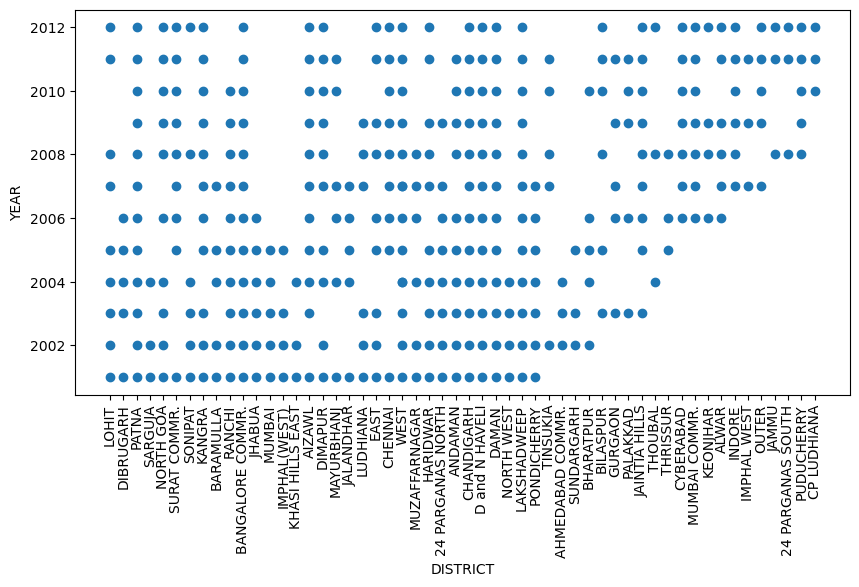

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(result['DISTRICT'], result['YEAR'])
plt.xlabel('DISTRICT')
plt.ylabel('YEAR')
plt.xticks(rotation=90)
plt.show()

In [32]:
#The above plot show the count when the districts comitted maximum murders yearwise

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


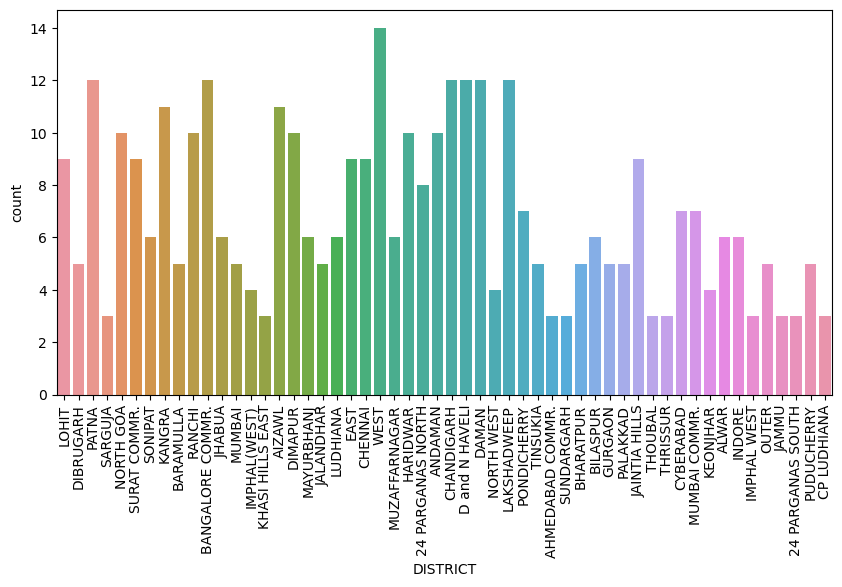

In [35]:
plt.figure(figsize=(10,5))
sns.countplot('DISTRICT', data=result)
plt.xticks(rotation=90)
plt.show()

In [37]:
# from the above graph we can see that there are so many districts in a state/UT which were on top wrt to number of murders for 3 0r more than 3 yrs 

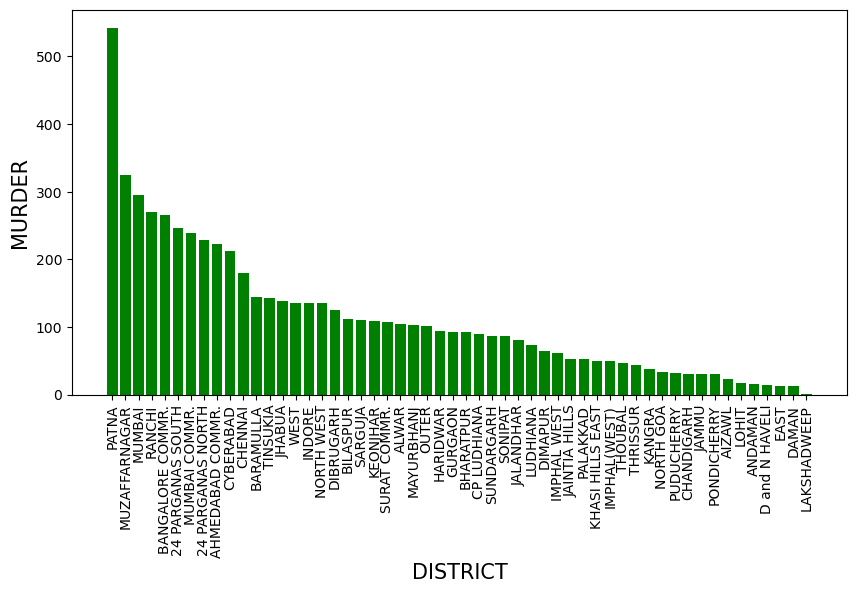

In [39]:
plt.figure(figsize=(10,5))
plt.bar('DISTRICT', 'MURDER', data=result.sort_values('MURDER', ascending=False), color='green')
plt.xlabel("DISTRICT", size=15)
plt.ylabel("MURDER", size=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Over the span of 2001 -2012 Patna, Muzaffarnagar, Mumbai, Ranchi, Bangalore Commr. were the states wher max number of murders were attempted. 